Loading DataSet

In [48]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, Rescaling
from keras.models import Model
import os

In [49]:
# Path to your dataset directory
data_dir = 'D:/darsi/CI/Project4/archive/raw-img'

translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "ragno": "spider",  
    "dog": "cane", "horse": "cavallo", "elephant": "elefante", "butterfly": "farfalla",
    "chicken": "gallina", "cat": "gatto", "cow": "mucca", "sheep": "pecora",
    "squirrel": "scoiattolo", "spider": "ragno"  
}


# Load the full dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(128, 128),  
    batch_size=None,         
    shuffle=True,            
    label_mode="int"         # Use integer labels (folder names)
)

# Retrieve class names before splitting
class_names = dataset.class_names

# Split dataset into train, test, and validation sets
train_ratio = 0.7
test_ratio = 0.2
validation_ratio = 0.1

# Calculate split sizes
num_samples = len(dataset)
train_size = int(train_ratio * num_samples)
test_size = int(test_ratio * num_samples)
validation_size = int(validation_ratio * num_samples)

# Split dataset
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size).take(test_size)
val_dataset = dataset.skip(train_size + test_size)

# Extract images and labels separately
def extract_data_and_labels(dataset):
    images = []
    labels = []
    for img, lbl in dataset:
        images.append(img)
        # labels.append(class_names[lbl.numpy()])  # Map integer label to class name
        class_name = class_names[lbl.numpy()]
        translated_label = translate[class_name]
        labels.append(translated_label)
    return images, labels

# Get train, test, and validation data and labels
train_images, train_labels = extract_data_and_labels(train_dataset)
test_images, test_labels = extract_data_and_labels(test_dataset)
val_images, val_labels = extract_data_and_labels(val_dataset)

# Checking the number of samples
print(f"Train samples: {len(train_images)}, Test samples: {len(test_images)}, Validation samples: {len(val_images)}")

Found 26179 files belonging to 10 classes.
Train samples: 18325, Test samples: 5235, Validation samples: 2619


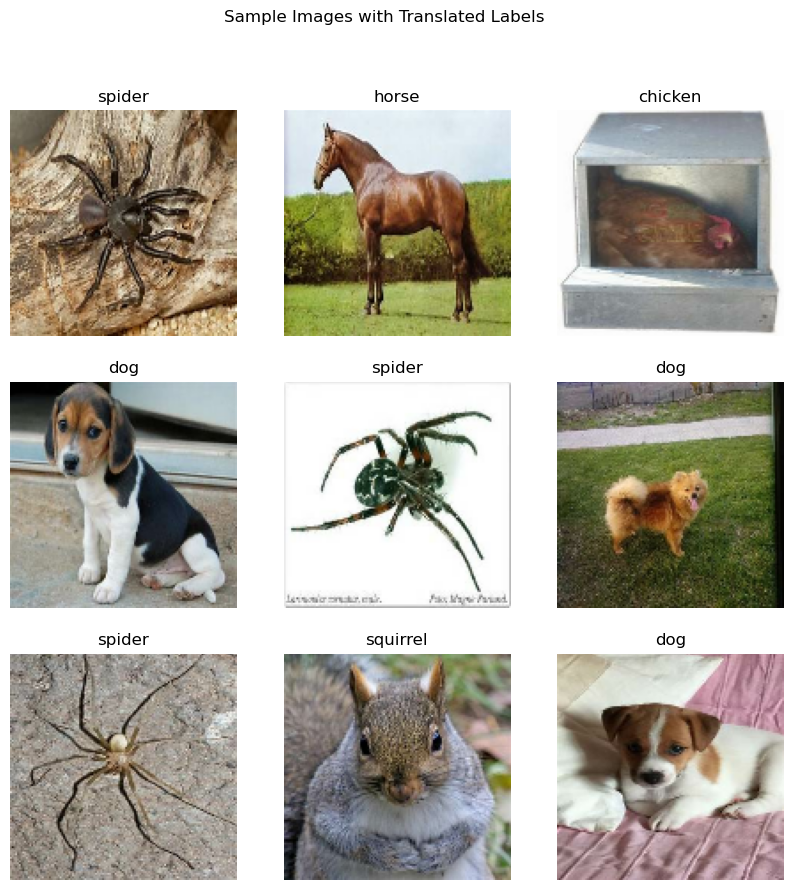

In [50]:
# Display sample images for checking
def plot_images(images, labels, title=None):
    plt.figure(figsize=(10, 10))
    for i in range(9):  
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i])
        plt.axis("off")
    if title:
        plt.suptitle(title)
    plt.show()


plot_images(train_images, train_labels, title="Sample Images with Translated Labels")

In [51]:
# Define optimizer with custom learning rate
optimizer = Adam(learning_rate=0.001)

# Define the model
# model = models.Sequential([
#     layers.Rescaling(1./255, input_shape=(90, 90, 3)),  
#     layers.Conv2D(16, (3, 3), activation='relu'),        
#     layers.MaxPooling2D((2, 2)),                        
#     layers.Conv2D(32, (3, 3), activation='relu'),        
#     layers.MaxPooling2D((2, 2)),                        
#     layers.Conv2D(64, (3, 3), activation='relu'),        
#     layers.MaxPooling2D((2, 2)),                        
#     layers.Flatten(),                                   
#     layers.Dense(256, activation='relu'),               
#     layers.Dense(10, activation='softmax')  # Output layer
# ])


# model = models.Sequential([
#     layers.Rescaling(1./255, input_shape=(90, 90, 3)),
#     layers.Conv2D(16, (3, 3), activation='relu'),
#     BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     BatchNormalization(),
#     layers.Dense(10, activation='softmax')
# ])

# model = models.Sequential([
#         layers.Rescaling(1./255, input_shape=(90, 90, 3)),
#         layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(400, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         layers.MaxPooling2D((2, 2)),
#         GlobalAveragePooling2D(),
#         layers.Dense(128, activation='relu'),
#         BatchNormalization(),
#         layers.Dense(10, activation='softmax')  
# ])

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(2048, activation='relu'),  
    
    layers.Dense(10, activation='softmax')
])



# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_28 (Rescaling)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_19     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 2048)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 917,642 (3.50 MB)

 Trainable params: 917,642 (3.50 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
train_images = np.array(train_images)
test_images = np.array(test_images)
val_images = np.array(val_images)

# Assuming translate is a dictionary that maps original class names to English names
class_names = [translate[class_name] for class_name in dataset.class_names]
print("Class names:", class_names)

# Create a mapping from class names to integers
class_to_index = {class_name: index for index, class_name in enumerate(class_names)}

# Convert string labels to integer labels using the mapping
train_labels = [class_to_index[label] for label in train_labels]
test_labels = [class_to_index[label] for label in test_labels]
val_labels = [class_to_index[label] for label in val_labels]

#Convert integer labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
val_labels = tf.keras.utils.to_categorical(val_labels)


Class names: ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']


In [53]:
print(f"Train images shape: {train_images.shape}")  
print(f"Train labels shape: {train_labels.shape}")  
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (18325, 128, 128, 3)
Train labels shape: (18325, 10)
Test images shape: (5235, 128, 128, 3)
Test labels shape: (5235, 10)


In [54]:
# Train the model
history = model.fit(
    train_images, train_labels,
    batch_size=150,
    epochs=15,
    validation_data=(val_images, val_labels)
)

Epoch 1/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.2003 - loss: 2.1766 - val_accuracy: 0.2558 - val_loss: 1.9965
Epoch 2/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.3251 - loss: 1.9000 - val_accuracy: 0.3520 - val_loss: 1.7963
Epoch 3/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.4075 - loss: 1.6819 - val_accuracy: 0.4559 - val_loss: 1.5571
Epoch 4/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.4738 - loss: 1.5138 - val_accuracy: 0.4685 - val_loss: 1.5379
Epoch 5/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.4975 - loss: 1.4325 - val_accuracy: 0.4842 - val_loss: 1.5111
Epoch 6/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5284 - loss: 1.3626 - val_accuracy: 0.5605 - val_loss: 1.2766
Epoch 7/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5637 - loss: 1.2450 - val_accuracy: 0.5743 - val_loss: 1.2395
Epoch 8/15
123/123 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.5792 - loss: 1.1879 - val_accu

In [44]:

# Evaluate train and validation accuracy
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Predict on the test dataset
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)  # Convert probabilities to class indices
test_labels_classes = np.argmax(test_labels, axis=1)  # Convert one-hot encoded labels to class indices

# Evaluate test accuracy
test_accuracy = accuracy_score(test_labels_classes, test_predictions_classes)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Calculate F1 score, precision, and recall
report = classification_report(
    test_labels_classes,
    test_predictions_classes,
    target_names=class_names
)

print("\nClassification Report:")
print(report)


Train Accuracy: 0.75
Validation Accuracy: 0.69
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step
Test Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

         dog       0.53      0.87      0.66       958
       horse       0.73      0.57      0.64       531
    elephant       0.68      0.69      0.68       298
   butterfly       0.91      0.76      0.83       439
     chicken       0.88      0.75      0.81       616
         cat       0.54      0.36      0.44       327
         cow       0.67      0.49      0.57       390
       sheep       0.61      0.66      0.63       374
      spider       0.88      0.79      0.83       959
    squirrel       0.66      0.50      0.57       343

    accuracy                           0.69      5235
   macro avg       0.71      0.65      0.67      5235
weighted avg       0.72      0.69      0.69      5235



164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step


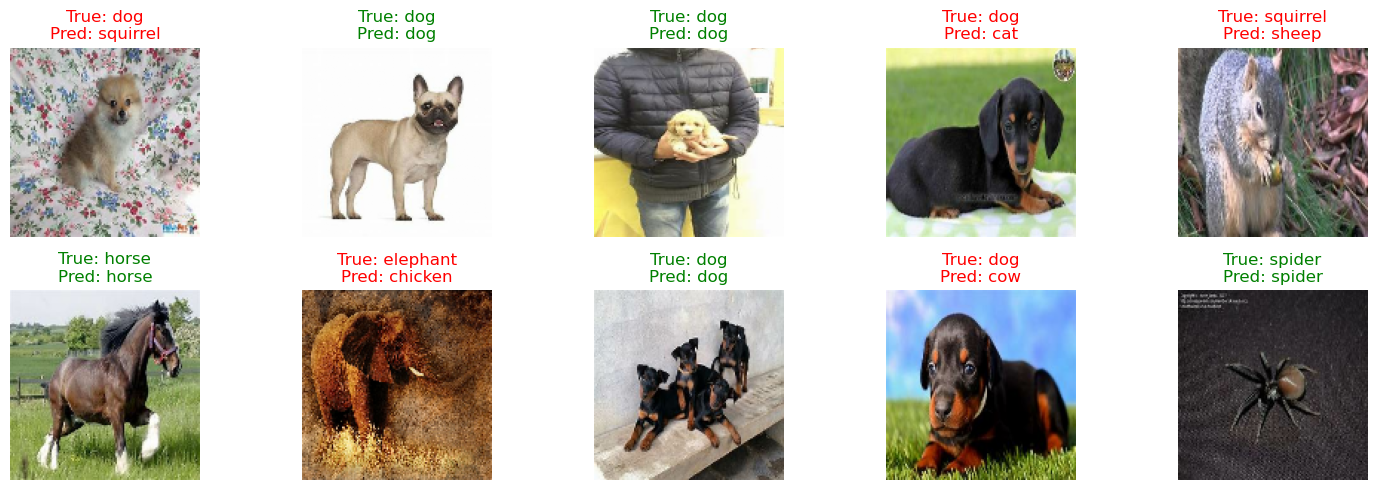

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict labels for test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot to class indices
true_labels = np.argmax(test_labels, axis=1)       # Convert one-hot to class indices

# Plot some samples
num_samples = 10  
random_indices = np.random.choice(len(test_images), num_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    # Normalize image for display (ensure range is [0, 1])
    image = test_images[idx] / 255.0 if test_images[idx].max() > 1 else test_images[idx]
    plt.imshow(image)  # Display normalized image
    plt.axis('off')
    true_label = class_names[true_labels[idx]]
    predicted_label = class_names[predicted_labels[idx]]
    color = "green" if true_label == predicted_label else "red"
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)

plt.tight_layout()
plt.show()


In [17]:
optimizer = Adam(learning_rate=0.0001)
def create_model(input_shape=(120, 120, 3)):
    input_layer = Input(shape=input_shape)
    x = Rescaling(1.0 / 255)(input_layer)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(units=10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

model = create_model()
# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 118, 118, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 59, 59, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 57, 57, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409,450 (5.38 MB)

 Trainable params: 1,409,450 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=30,
    validation_data=(val_images, val_labels)
)

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step - accuracy: 0.6524 - loss: 1.0531 - val_accuracy: 0.6014 - val_loss: 1.2100
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.6624 - loss: 1.0214 - val_accuracy: 0.6094 - val_loss: 1.2061
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step - accuracy: 0.6811 - loss: 0.9826 - val_accuracy: 0.6006 - val_loss: 1.1937
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.6866 - loss: 0.9625 - val_accuracy: 0.6006 - val_loss: 1.1948
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.6956 - loss: 0.9397 - val_accuracy: 0.5983 - val_loss: 1.2114
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.6965 - loss: 0.9326 - val_accuracy: 0.6132 - val_loss: 1.1816
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step - accuracy: 0.7149 - loss: 0.8902 - val_accuracy: 0.6243 - val_loss: 1.1506
Epoch 8/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.7134 - loss: 0

In [15]:
# Evaluate train and validation accuracy
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Predict on the test dataset
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)  # Convert probabilities to class indices
test_labels_classes = np.argmax(test_labels, axis=1)  # Convert one-hot encoded labels to class indices

# Evaluate test accuracy
test_accuracy = accuracy_score(test_labels_classes, test_predictions_classes)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Calculate F1 score, precision, and recall
report = classification_report(
    test_labels_classes,
    test_predictions_classes,
    target_names=class_names
)

print("\nClassification Report:")
print(report)


Train Accuracy: 0.98
Validation Accuracy: 0.66
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step
Test Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

         dog       0.64      0.70      0.67       937
       horse       0.78      0.61      0.69       521
    elephant       0.69      0.59      0.63       287
   butterfly       0.81      0.64      0.72       425
     chicken       0.74      0.72      0.73       600
         cat       0.58      0.39      0.47       345
         cow       0.65      0.57      0.61       391
       sheep       0.66      0.57      0.61       371
      spider       0.70      0.90      0.79       997
    squirrel       0.51      0.64      0.57       361

    accuracy                           0.68      5235
   macro avg       0.68      0.63      0.65      5235
weighted avg       0.68      0.68      0.67      5235



In [63]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(90, 90, 3)),  
    layers.Conv2D(16, (3, 3), activation='relu'),        
    layers.MaxPooling2D((2, 2)),                        
    layers.Conv2D(32, (3, 3), activation='relu'),        
    layers.MaxPooling2D((2, 2)),                        
    layers.Conv2D(64, (3, 3), activation='relu'),        
    layers.MaxPooling2D((2, 2)),                        
    layers.Flatten(),                                   
    layers.Dense(256, activation='relu'),               
    layers.Dense(10, activation='softmax')  # Output layer
])



# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_36 (Rescaling)        │ (None, 90, 90, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_125 (Conv2D)             │ (None, 88, 88, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 44, 44, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 42, 42, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_116               │ (None, 21, 21, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_127 (Conv2D)             │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_117               │ (None, 9, 9, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 256)            │     1,327,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,188,800 (12.16 MB)

 Trainable params: 1,353,514 (5.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,835,286 (7.00 MB)

In [64]:
history = model.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=10,
    validation_data=(val_images, val_labels)
)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_73" is incompatible with the layer: expected axis -1 of input shape to have value 5184, but received input with shape (None, 12544)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=True
  • mask=None

Phase 2:


In [74]:
model_reduced = models.Sequential([
    layers.Rescaling(1./255, input_shape=(90, 90, 3)),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model_reduced.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model_reduced.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_46 (Rescaling)        │ (None, 90, 90, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_164 (Conv2D)             │ (None, 88, 88, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_154               │ (None, 44, 44, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_165 (Conv2D)             │ (None, 42, 42, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_155               │ (None, 21, 21, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_166 (Conv2D)             │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_156               │ (None, 9, 9, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_167 (Conv2D)             │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_157               │ (None, 3, 3, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_27     │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 2048)           │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,122 (836.41 KB)

 Trainable params: 214,122 (836.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_reduced.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=10,
    validation_data=(val_images, val_labels)
)